# Linear Regression in Tensorflow

##Mount the Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Check the working directory

In [0]:
!ls "/content/drive/My Drive/"

##Change to a specific folder on Google Drive

In [0]:
import os
os.chdir("drive/My Drive/")

#Import the libraries

In [0]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

#Parameter settings

In [0]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

#Defining the Training dataset

In [0]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# n_samples = train_X.shape[0]

#Defining the tensorflow placeholders and variables

In [6]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

Instructions for updating:
Colocations handled automatically by placer.


#Defining model, cost function, and Optimizer

In [7]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
# cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.cast instead.


#Build the model and execute on the training and testing data

Create TensorFlow session

In [0]:
# Start training
sess = tf.Session()
# Another option: with tf.Session() as sess:

Initialize the variables

In [0]:
# Run the initializer
sess.run(init)

Train the model

Epoch: 0050 cost= 1.498682261 W= 0.2805377 b= 0.48505512
Epoch: 0050 cost= 1.790490866 W= 0.32632318 b= 0.4954609
Epoch: 0050 cost= 1.567547441 W= 0.31531006 b= 0.4934585
Epoch: 0050 cost= 2.780510664 W= 0.35428247 b= 0.49926662
Epoch: 0050 cost= 1.718373537 W= 0.2669337 b= 0.48666218
Epoch: 0050 cost= 1.743378162 W= 0.26583993 b= 0.48639977
Epoch: 0050 cost= 1.410109043 W= 0.29321638 b= 0.48919928
Epoch: 0050 cost= 1.510816455 W= 0.31139994 b= 0.49214065
Epoch: 0050 cost= 1.436357617 W= 0.28668186 b= 0.488884
Epoch: 0050 cost= 1.421635270 W= 0.28908455 b= 0.48999277
Epoch: 0050 cost= 1.498376250 W= 0.31030023 b= 0.4930055
Epoch: 0050 cost= 1.653426409 W= 0.26967692 b= 0.48924094
Epoch: 0050 cost= 2.022876263 W= 0.25522372 b= 0.4865206
Epoch: 0050 cost= 1.443386555 W= 0.28532887 b= 0.49028513
Epoch: 0050 cost= 1.433960199 W= 0.30322182 b= 0.49344978
Epoch: 0050 cost= 1.655900121 W= 0.26944974 b= 0.48980662
Epoch: 0050 cost= 1.672019482 W= 0.2686716 b= 0.48955563
Epoch: 0100 cost= 1.436

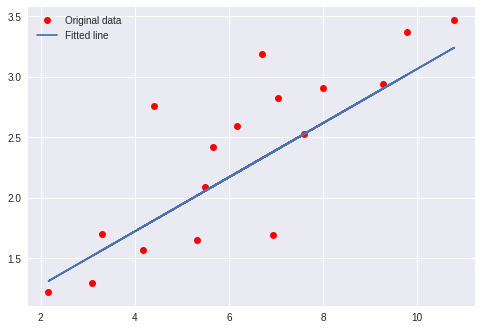

In [12]:
# Fit all training data
for epoch in range(training_epochs):
  for (x, y) in zip(train_X, train_Y):
    sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
      c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
      print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
              "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")

# Print the cost, weight and bias after the model training
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
# Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Testing the trained model

In [0]:
# Testing example:
test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

print("Testing... (Mean square loss Comparison)")
# testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),feed_dict={X: test_X, Y: test_Y})  # same function as cost above
testing_cost = sess.run(tf.reduce_sum(tf.pow(pred - Y, 2)) / (2),feed_dict={X: test_X, Y: test_Y})  # same function as cost above
print("Testing cost=", testing_cost)
print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

plt.plot(test_X, test_Y, 'bo', label='Testing data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

Predict output for new value

In [0]:
#Predicting output on new value:
print("For new value '3.5'...\n")
print("Predicted output:", sess.run(pred,feed_dict={X: 3.5}))

#Entering new value through Form 

In [0]:
#@title Enter a new value { form-width: "100%" }
New_X = 3.5 #@param {type:"number"}


In [0]:
#Predicting output on new value:
print("For new value...\n")
print("Predicted output:", sess.run(pred,feed_dict={X: New_X} ))

Close the Tensorflow session

In [0]:
sess.close()